In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
import os

In [ ]:
target_width = 500
target_height = 500

In [ ]:
root_directory = 'C:/Users/usha kiran.k/Downloads/datset/training/train/drone'

for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
            # Construct the full path to the image file
            image_path = os.path.join(root, file)

            # Perform the image resizing
            image = Image.open(image_path)
            new_size = (target_width, target_height)
            resized_image = image.resize(new_size)

            # Save the resized image back to the original location
            resized_image.save(image_path)

In [ ]:
root_directory = 'C:/Users/usha kiran.k/Downloads/datset/training/test'

for root, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
            # Construct the full path to the image file
            image_path = os.path.join(root, file)

            # Perform the image resizing
            image = Image.open(image_path)
            new_size = (target_width, target_height)
            resized_image = image.resize(new_size)

            # Save the resized image back to the original location
            resized_image.save(image_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 500
CHANNELS=3
EPOCHS=50

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/clutter/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2100 files belonging to 6 classes.


In [ ]:
class_names = train_dataset.class_names
class_names

['birds', 'cloud', 'drone', 'fighter jet', 'helicopter', 'passenger plane']

In [ ]:
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 500, 500, 3)
[3 0 0 3 0 2 1 2 4 2 3 1 2 2 2 2 5 0 3 4 4 1 0 3 3 3 1 4 3 2 2 3]


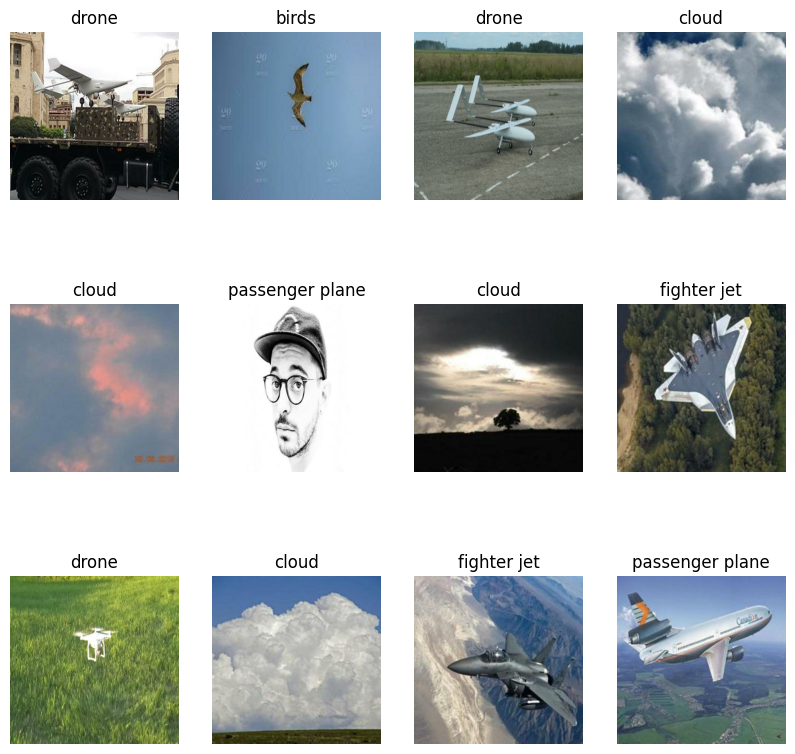

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(train_dataset)

66

In [ ]:
62*32


1984

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/clutter/test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 739 files belonging to 6 classes.


In [ ]:
len(dataset)

24

In [ ]:
val_size=0.2
len(dataset)*0.2

4.800000000000001

In [ ]:
val_dataset= dataset.take(5)
len(val_dataset)

5

In [ ]:
test_dataset=dataset.skip(5)
len(test_dataset)

19

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 500, 500, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 498, 498, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 249, 249, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 247, 247, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 123, 123, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 121, 121, 64)       

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=50,
)
model.save("/content/drive/MyDrive/clutter/model.h5")


Epoch 1/50
66/66 [==============================] - 423s 6s/step - loss: 1.7569 - accuracy: 0.1995 - val_loss: 1.6239 - val_accuracy: 0.3250
Epoch 2/50
66/66 [==============================] - 86s 1s/step - loss: 1.5490 - accuracy: 0.3338 - val_loss: 1.7077 - val_accuracy: 0.3750
Epoch 3/50
66/66 [==============================] - 90s 1s/step - loss: 1.4466 - accuracy: 0.4114 - val_loss: 1.2881 - val_accuracy: 0.4437
Epoch 4/50
66/66 [==============================] - 90s 1s/step - loss: 1.3543 - accuracy: 0.4614 - val_loss: 1.3394 - val_accuracy: 0.4563
Epoch 5/50
66/66 [==============================] - 90s 1s/step - loss: 1.2950 - accuracy: 0.4729 - val_loss: 1.3354 - val_accuracy: 0.5500
Epoch 6/50
66/66 [==============================] - 90s 1s/step - loss: 1.2624 - accuracy: 0.4838 - val_loss: 1.5373 - val_accuracy: 0.3438
Epoch 7/50
66/66 [==============================] - 90s 1s/step - loss: 1.2417 - accuracy: 0.4957 - val_loss: 1.2880 - val_accuracy: 0.5375
Epoch 8/50
66/66 [=

In [ ]:
scores = model.evaluate(test_dataset)

19/19 [==============================] - 59s 3s/step - loss: 1.7939 - accuracy: 0.4888


In [ ]:
model.save("/content/drive/MyDrive/clutter/model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

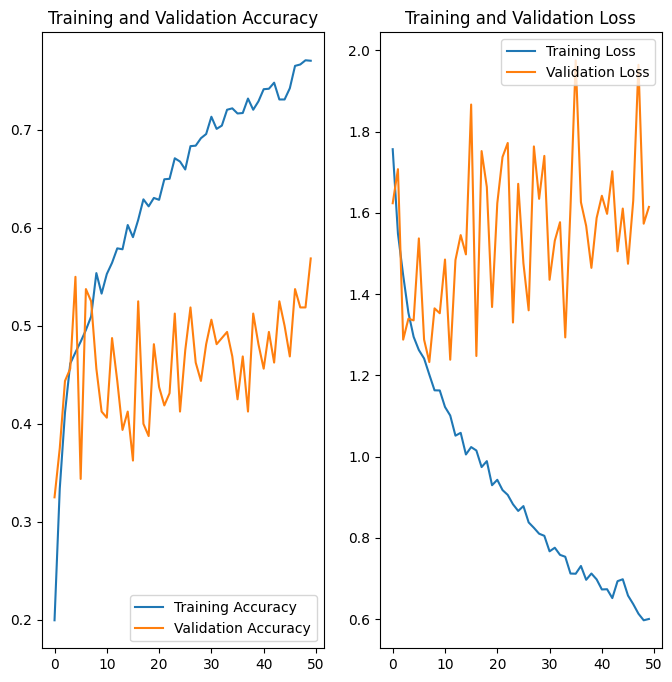

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Add, Dropout, LSTM, TimeDistributed, Embedding, RepeatVector, Concatenate, Bidirectional, Convolution2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(500,500,3))
for layer in resnet_50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(6, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [ ]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, batch_size=batch_size)

In [ ]:
# launch the training
model_history = trainModel(model = model, epochs = 70, optimizer = "Adam")

Epoch 1/70
66/66 [==============================] - 516s 8s/step - loss: 2.0166 - accuracy: 0.2100 - val_loss: 1.5635 - val_accuracy: 0.4125
Epoch 2/70
66/66 [==============================] - 101s 2s/step - loss: 1.5866 - accuracy: 0.3143 - val_loss: 1.3701 - val_accuracy: 0.3688
Epoch 3/70
66/66 [==============================] - 103s 2s/step - loss: 1.4409 - accuracy: 0.3781 - val_loss: 1.2883 - val_accuracy: 0.4062
Epoch 4/70
66/66 [==============================] - 101s 2s/step - loss: 1.3586 - accuracy: 0.4138 - val_loss: 1.2606 - val_accuracy: 0.3688
Epoch 5/70
66/66 [==============================] - 101s 2s/step - loss: 1.2470 - accuracy: 0.4605 - val_loss: 1.0801 - val_accuracy: 0.5813
Epoch 6/70
66/66 [==============================] - 101s 2s/step - loss: 1.1541 - accuracy: 0.5100 - val_loss: 1.1703 - val_accuracy: 0.4625
Epoch 7/70
66/66 [==============================] - 103s 2s/step - loss: 1.0369 - accuracy: 0.5719 - val_loss: 0.9731 - val_accuracy: 0.6125
Epoch 8/70
66

In [ ]:
model.save("/content/drive/MyDrive/clutter/model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
scores = model.evaluate(test_dataset)

19/19 [==============================] - 60s 3s/step - loss: 1.0964 - accuracy: 0.7064


In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

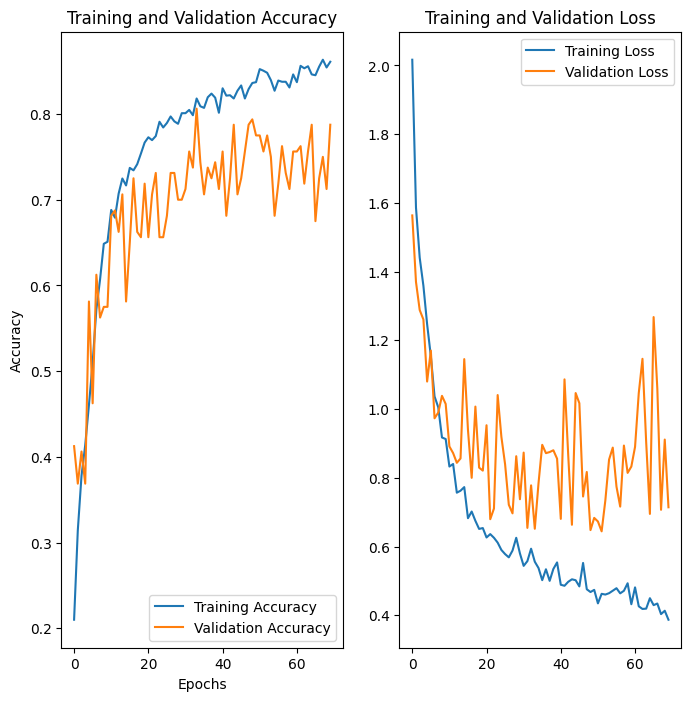

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: cloud
1/1 [==============================] - 1s 1s/step
predicted label: cloud


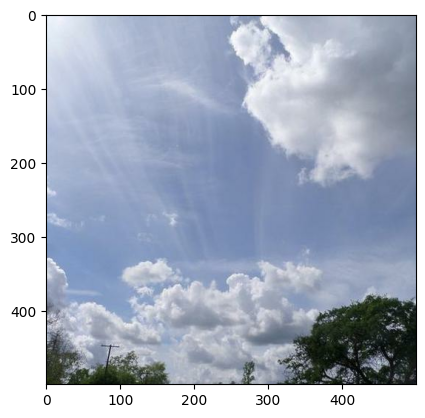

In [ ]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


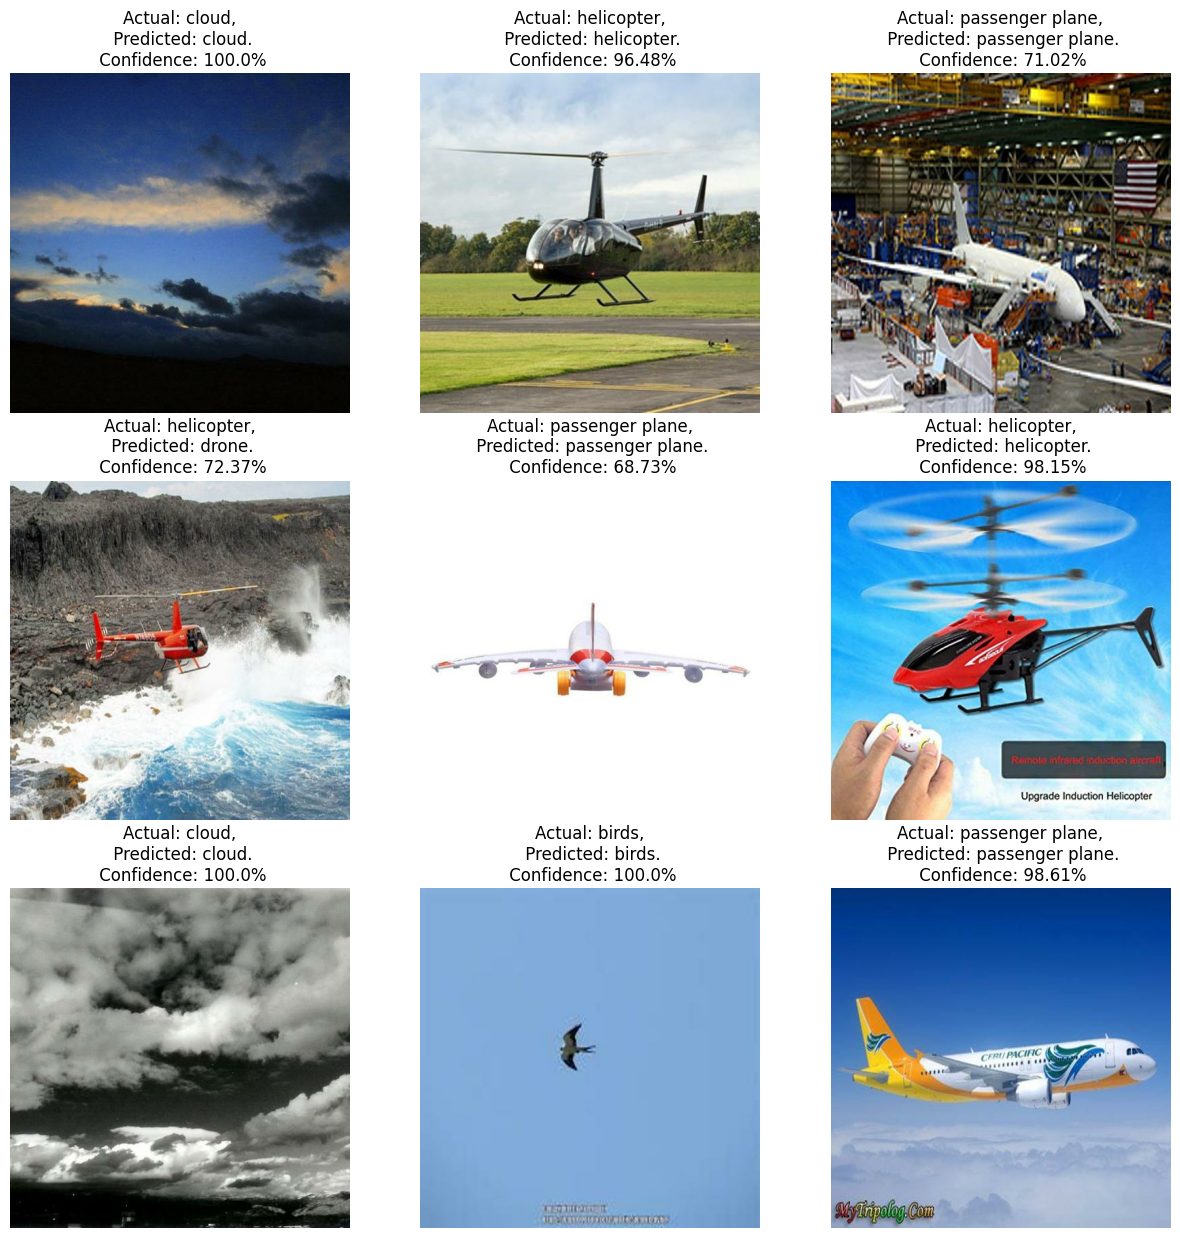

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")